Classification of Arrythmia in ECG tests using Keras 2D CNN

Labels:

A->Atrial premature beat

L->Left bundle branch block beat

N->Normal beat

R->Right bundle branch block beat

V->Premature ventricular contraction

F-> Fusion of ventricular and normal beat

In [1]:
import os
import shutil

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
train_dir = "G:\\My Drive\\TRAIN_GRADPROJ2"
test_dir = "G:\\My Drive\\TEST_GRADPROJ2"

In [1]:
testA='G:\\My Drive\\TEST_GRADPROJ2\\A'
testL='G:\\My Drive\\TEST_GRADPROJ2\\L'
testN='G:\\My Drive\\TEST_GRADPROJ2\\N'
testR='G:\\My Drive\\TEST_GRADPROJ2\\R'
testV='G:\\My Drive\\TEST_GRADPROJ2\\V'
testp='G:\\My Drive\\TEST_GRADPROJ2\\p'
trainA='G:\\My Drive\\TRAIN_GRADPROJ2\\A'
trainL='G:\\My Drive\\TRAIN_GRADPROJ2\\L'
trainN='G:\\My Drive\\TRAIN_GRADPROJ2\\N'
trainR='G:\\My Drive\\TRAIN_GRADPROJ2\\R'
trainV='G:\\My Drive\\TRAIN_GRADPROJ2\\V'
trainp='G:\\My Drive\\TRAIN_GRADPROJ2\\p'

In [5]:
import os

directory_paths = [
    testA, testL, testN, testR, testV, testp
]

image_counts = {}

for directory_path in directory_paths:
    class_name = os.path.basename(directory_path)
    image_count = len(os.listdir(directory_path))
    image_counts[class_name] = image_count

for class_name, count in image_counts.items():
    print(f"Class '{class_name}' contains {count} images.")


Class 'A' contains 530 images.
Class 'L' contains 1614 images.
Class 'N' contains 10545 images.
Class 'R' contains 1452 images.
Class 'V' contains 1426 images.
Class 'p' contains 1404 images.


In [6]:
trainA='G:\\My Drive\\TRAIN_GRADPROJ2\\A'
trainL='G:\\My Drive\\TRAIN_GRADPROJ2\\L'
trainN='G:\\My Drive\\TRAIN_GRADPROJ2\\N'
trainR='G:\\My Drive\\TRAIN_GRADPROJ2\\R'
trainV='G:\\My Drive\\TRAIN_GRADPROJ2\\V'
trainp='G:\\My Drive\\TRAIN_GRADPROJ2\\p'

In [8]:
import os

# Define the directory paths
directory_paths = [
    trainA, trainL, trainN, trainR, trainV, trainp
]

# Create a dictionary to store the counts for each directory
image_counts = {}

# Loop through each directory and count the number of files
for directory_path in directory_paths:
    class_name = os.path.basename(directory_path)
    image_count = len(os.listdir(directory_path))
    image_counts[class_name] = image_count

# Print the counts
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' contains {count} images.")


Class 'A' contains 8299 images.
Class 'L' contains 12928 images.
Class 'N' contains 10734 images.
Class 'R' contains 11594 images.
Class 'V' contains 11392 images.
Class 'p' contains 11204 images.


In [9]:
trainA_names = os.listdir(trainA)
trainL_names = os.listdir(trainL)
trainN_names = os.listdir(trainN)
trainR_names = os.listdir(trainR)
trainV_names = os.listdir(trainV)
trainp_names = os.listdir(trainp)

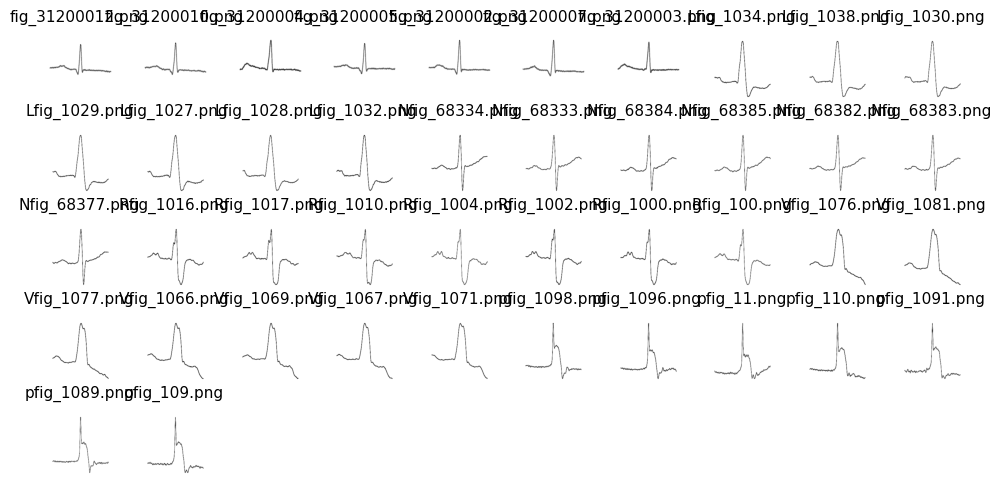

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rows = 10
columns = 10
fig = plt.gcf()
fig.set_size_inches(12, 12)

A_img = [os.path.join(trainA, filename) for filename in trainA_names[0:7]]
L_img = [os.path.join(trainL, filename) for filename in trainL_names[0:7]]
N_img = [os.path.join(trainN, filename) for filename in trainN_names[0:7]]
R_img = [os.path.join(trainR, filename) for filename in trainR_names[0:7]]
V_img = [os.path.join(trainV, filename) for filename in trainV_names[0:7]]
p_img = [os.path.join(trainp, filename) for filename in trainp_names[0:7]]

merged_img = A_img + L_img + N_img + R_img + V_img + p_img

for i, img_path in enumerate(merged_img):
    title = os.path.basename(img_path)  # Extract the file name from the path
    plot = plt.subplot(rows, columns, i + 1)
    plot.axis("off")
    img = mpimg.imread(img_path)
    plot.set_title(title, fontsize=11)
    plt.imshow(img, cmap="gray")

plt.show()


In [10]:
import os
from PIL import Image

dataset_path = test_dir

error_flag = False  # Initialize an error flag

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
        except Exception as e:
            print(f"Error with file: {file_path}, Error: {e}")
            error_flag = True  # Set the error flag to True if an error occurs

if not error_flag:
    print("No errors have occurred during file checking.")


No errors have occurred during file checking.


In [11]:
import os
from PIL import Image

dataset_path = train_dir

error_flag = False  # Initialize an error flag

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
        except Exception as e:
            print(f"Error with file: {file_path}, Error: {e}")
            error_flag = True  # Set the error flag to True if an error occurs

if not error_flag:
    print("No errors have occurred during file checking.")


Error with file: G:\My Drive\TRAIN_GRADPROJ2\A\desktop.ini, Error: cannot identify image file 'G:\\My Drive\\TRAIN_GRADPROJ2\\A\\desktop.ini'


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the directory paths for your data
# Create generators for training and validation data
train_datagen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Adjust the target size as needed
    batch_size=32,           # Adjust the batch size as needed
    class_mode='categorical'  # Adjust the class mode based on your dataset
)

validation_datagen = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Adjust the target size as needed
    batch_size=32,           # Adjust the batch size as needed
    class_mode='categorical'  # Adjust the class mode based on your dataset
)

Found 66150 images belonging to 6 classes.
Found 16971 images belonging to 6 classes.


In [13]:
# Define the input shape based on the image dimensions
input_shape = (150, 150, 1)  # Adjust the dimensions as needed

# Create a Sequential model
model = Sequential()

# Add the layers
model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=train_datagen.image_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))  # Add dropout here

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))  # Add dropout here

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.1))  # Add dropout here

model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [16]:
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_datagen, epochs= 100, validation_data= validation_datagen)

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

 # Replace with the path to your test data folder
class_names = sorted(os.listdir(test_dir))  # Get the class names from the subfolders

test_data = []
test_labels = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for image_filename in os.listdir(class_dir):
        if image_filename.endswith('.jpg') or image_filename.endswith('.png'):
            # Load and preprocess the image
            image = load_img(os.path.join(class_dir, image_filename), target_size=(150, 150))  # Adjust the target size
            image = img_to_array(image)
            image = image / 255.0  # Normalize the image data if needed
            test_data.append(image)
            test_labels.append(class_name)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Evaluate the model on the original test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Set Loss: ", test_loss)
print("Test Set Accuracy: ", test_acc)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

In [ ]:
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

# Assuming you have a model configured for multi-class classification with 4 output units.
# Ensure you've compiled the model with the correct loss function and activation.

class_names = ["A","L","N","p","R","V"]

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size=(150, 150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  predictions = model.predict(images)

  # Assuming your model returns class probabilities, predictions will be an array.
  # You can use argmax to find the class with the highest probability.
  predicted_class = np.argmax(predictions)

  print(f"The report is: {class_names[predicted_class]}")


In [ ]:
model.save("model.h5")